## AutoEncoder for  MNIST 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tf.random.set_seed(42)
np.random.seed(42)    

### Step 1. Data -  target class : 10

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

### Plot images

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


### Show Reconstruction Images

In [ ]:
def show_reconstructions(model, images=X_test, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])


### Save Imges

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Step 2. AE Model

In [ ]:
# Step 2. Model
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
print(stacked_ae.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 30)                81530     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________
None


### Step 3. Loss, Optimizer and Metric

In [ ]:
# Step 3. Loss,Optimizer, Metric
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Step 4. Train the model

In [ ]:
# Step 4. Train the model
history = stacked_ae.fit(X_train, X_train, epochs=20, verbose=2,
                  validation_split=0.2)

Epoch 1/20
1500/1500 - 6s - loss: 0.1902 - rounded_accuracy: 0.9152 - val_loss: 0.1463 - val_rounded_accuracy: 0.9395
Epoch 2/20
1500/1500 - 5s - loss: 0.1351 - rounded_accuracy: 0.9461 - val_loss: 0.1290 - val_rounded_accuracy: 0.9494
Epoch 3/20
1500/1500 - 5s - loss: 0.1261 - rounded_accuracy: 0.9510 - val_loss: 0.1238 - val_rounded_accuracy: 0.9524
Epoch 4/20
1500/1500 - 5s - loss: 0.1206 - rounded_accuracy: 0.9540 - val_loss: 0.1184 - val_rounded_accuracy: 0.9553
Epoch 5/20
1500/1500 - 5s - loss: 0.1172 - rounded_accuracy: 0.9560 - val_loss: 0.1161 - val_rounded_accuracy: 0.9566
Epoch 6/20
1500/1500 - 5s - loss: 0.1148 - rounded_accuracy: 0.9573 - val_loss: 0.1140 - val_rounded_accuracy: 0.9577
Epoch 7/20
1500/1500 - 5s - loss: 0.1128 - rounded_accuracy: 0.9584 - val_loss: 0.1124 - val_rounded_accuracy: 0.9589
Epoch 8/20
1500/1500 - 5s - loss: 0.1107 - rounded_accuracy: 0.9596 - val_loss: 0.1100 - val_rounded_accuracy: 0.9600
Epoch 9/20
1500/1500 - 5s - loss: 0.1085 - rounded_accur

### Plot the Training/Validation loss

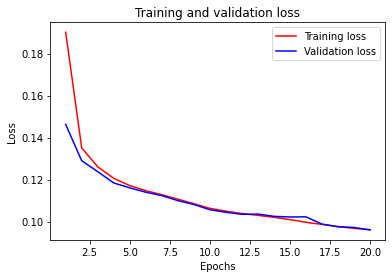

In [ ]:
history_dict = history.history
#print(history_dict.keys())

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'r', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Show Original and Reconstruected Images

Saving figure reconstruction_plot


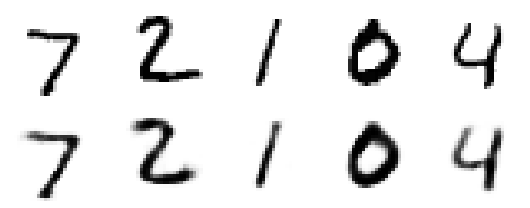

In [ ]:
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

In [ ]:
### Step 5. Test the Model

In [ ]:
X_test_compressed = stacked_encoder.predict(X_test)

### Image Visualization with TSNE

In [18]:
tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)
X_test_2D = (X_test_2D - X_test_2D.min()) / (X_test_2D.max() - X_test_2D.min())

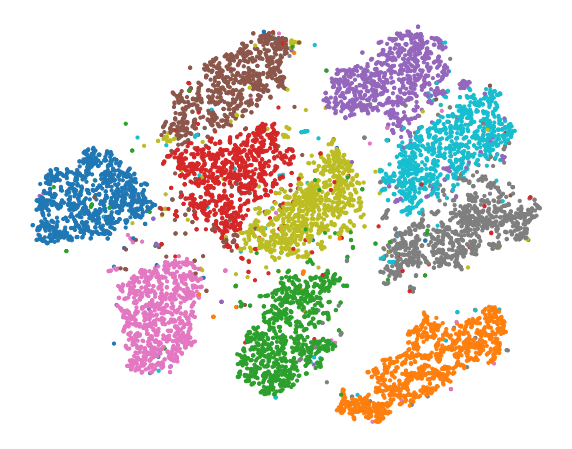

In [19]:

plt.figure(figsize=(10, 8))
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=10, cmap="tab10")
plt.axis("off")
plt.show()

In [20]:
print(X_test.shape, y_test.shape, X_test_compressed.shape)

(10000, 28, 28) (10000,) (10000, 30)


### Plot MNIST on 2D Domain

Saving figure fashion_mnist_visualization_plot


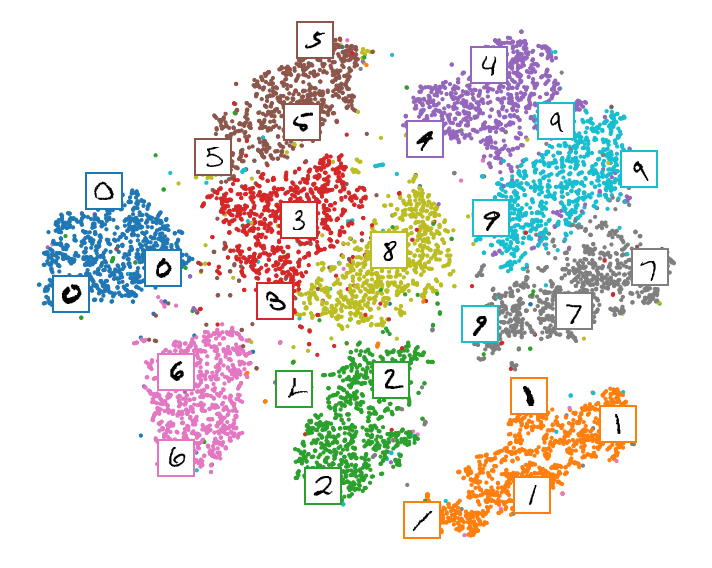

In [21]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_test_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_test[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_test[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()